In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
%matplotlib inline
matplotlib.style.use("ggplot")

# 5. Modeling the data:

     Vamos a cargar los ficheros que preparamos para modelizar en los puntos anteriorres:

In [177]:
TennisDFnorm_X = pd.read_csv('../_TFM_ML4SportsBets/TennisDFnorm_X',index_col=None, header=0)

In [178]:
TennisDF = pd.read_csv('../_TFM_ML4SportsBets/TennisDF_y',index_col=None, header=0)

In [179]:
framesDCWO2 = pd.read_csv('../_TFM_ML4SportsBets/framesDCWO2',index_col=None, header=0)

In [180]:
TennisDFnorm_X.head()

dif_Rank  dif_RankP  dif_Height   dif_Age    w_hand    l_hand  dif_Minutes  \
0 -0.429112   0.480356    0.845264 -1.907903  0.368448 -2.576821    -0.004915   
1 -0.278954   0.634250    0.738884 -1.603764 -2.714087  0.388075    -0.004915   
2  1.356094  -0.266931    0.738884  0.043516  0.368448 -2.576821    -0.004915   
3  0.054729  -0.055915   -0.537676  0.569459  0.368448  0.388075    -0.004915   
4 -0.087086   0.036610    0.206984 -1.044215  0.368448  0.388075    -0.004915   

   dif_Aces    dif_Df  dif_1stIn  dif_1stWon  dif_2ndWon  dif_BpSv  
0  1.895517 -1.833948  -0.789742    0.001725   -0.230945  0.181169  
1  1.009726  3.755639  -0.275683    0.146904    1.047744 -0.319451  
2 -0.000907 -4.543214   3.741265    2.965791   -1.636733  2.122969  
3 -0.587074 -3.116080  -1.792722   -2.792965    1.571545 -1.517906  
4 -0.000907 -5.840609   0.562962    1.589617    2.455458  2.316045

## 5.1. Base line model:

     Vamos a buscar un escenario base para poder medir los progresos de nuestros modelos. Para este escenario utilizaré dif_Rank (diferencia de ranking atp de los dos jugadores), algo que es sencillo de obtener y de interpretar. El índice de acierto debería mejorar el propio azar, aunque con un resultado muy bajo.
     Para el base line utilizaremos un modelo de Regresión Logística:

In [181]:
TennisDF_y = TennisDF['Y']

In [182]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

In [183]:
X = TennisDFnorm_X[['dif_Rank']]
y = TennisDF_y

In [184]:
logreg = linear_model.LogisticRegression()

In [185]:
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [186]:
logreg.score(X, y, sample_weight=None)

0.65701380884048088

    Esto no es del todo correcto, debería separar el dataframe en un set para entrenar el modelo y otro para hacer el test. De esta forma obtendremos un modelo más realista.

In [187]:
X_train,X_test,y_train,y_test = train_test_split(X, y)

In [188]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [189]:
logreg.score(X_test, y_test, sample_weight=None)

0.66080165600301088

     Vamos a hacer cross validation para ver la varianza en el resultado:

In [190]:
from sklearn.model_selection import cross_val_score

In [191]:
cross_val_score(logreg, X_test, y_test,cv=5) 

array([ 0.65428034,  0.66462841,  0.67074318,  0.656     ,  0.65788235])

In [192]:
np.average(cross_val_score(logreg, X_test, y_test,cv=5))

0.66070685628908199

###       5.1.1. Analisis de la Colinearidad:

     Como advertimos al inicio del proyecto, sabemos por análisis preliminares de la posible existencia de colinearidad en los datos que describen el resultado de los partidos. Vamos a estudiar individualmente todos esos datos, con objeto de conocer su correlación con la variable objetivo y desechar aquellas que estén introduciendo el resultado en las variables predictoras:

    1. First In:

In [193]:
X = TennisDFnorm_X[['dif_1stIn']]

In [194]:
X_train,X_test,y_train,y_test = train_test_split(X, y)
logreg.fit(X_train, y_train)
cross_val_score(logreg, X_test, y_test,cv=5) 

array([ 0.60253998,  0.58231421,  0.57337723,  0.59247059,  0.60470588])

     OK, no existe una correlación importante con el resultado.

    2. Second Won:

In [195]:
X = TennisDFnorm_X[['dif_2ndWon']]

In [196]:
X_train,X_test,y_train,y_test = train_test_split(X, y)
logreg.fit(X_train, y_train)
cross_val_score(logreg, X_test, y_test,cv=5) 

array([ 0.70521862,  0.71213547,  0.71952941,  0.71011765,  0.70917647])

     Existe una correalción fuerte. Deberíamos rechazarla en el modelo.

    3. First Won:

In [197]:
X = TennisDFnorm_X[['dif_1stWon']]

In [198]:
X_train,X_test,y_train,y_test = train_test_split(X, y)
logreg.fit(X_train, y_train)
cross_val_score(logreg, X_test, y_test,cv=5) 

array([ 0.86876764,  0.87300094,  0.86030103,  0.86070588,  0.86070588])

     Existe una correalción fuerte. Deberíamos rechazarla en el modelo.

    4. Break Points saved:

In [199]:
X = TennisDFnorm_X[['dif_BpSv']]

In [200]:
X_train,X_test,y_train,y_test = train_test_split(X, y)
logreg.fit(X_train, y_train)
cross_val_score(logreg, X_test, y_test,cv=5) 

array([ 0.97318909,  0.97083725,  0.96472248,  0.97082353,  0.96894118])

     Está totalmente correlacionada con el resultado. Normalmente gana el partido el que mas veces rompa el servicio a su rival, por tanto este estadístico explica (individualemente) en un 97% de los casos el resultado del partido.
     
     Como habíamos previsto estas dos magnitudes combinan el total de puntos jugados, dentro a la primera, ganados a la primera y segunda. Evidentemente con toda esta información, simplemente sumando, podemos obtener el ganador. Tenemos que quitarlos del data set.

In [201]:
del TennisDFnorm_X['dif_1stWon']
del TennisDFnorm_X['dif_2ndWon']
del TennisDFnorm_X['dif_BpSv']

In [202]:
X = TennisDFnorm_X

In [203]:
X.head()

dif_Rank  dif_RankP  dif_Height   dif_Age    w_hand    l_hand  dif_Minutes  \
0 -0.429112   0.480356    0.845264 -1.907903  0.368448 -2.576821    -0.004915   
1 -0.278954   0.634250    0.738884 -1.603764 -2.714087  0.388075    -0.004915   
2  1.356094  -0.266931    0.738884  0.043516  0.368448 -2.576821    -0.004915   
3  0.054729  -0.055915   -0.537676  0.569459  0.368448  0.388075    -0.004915   
4 -0.087086   0.036610    0.206984 -1.044215  0.368448  0.388075    -0.004915   

   dif_Aces    dif_Df  dif_1stIn  
0  1.895517 -1.833948  -0.789742  
1  1.009726  3.755639  -0.275683  
2 -0.000907 -4.543214   3.741265  
3 -0.587074 -3.116080  -1.792722  
4 -0.000907 -5.840609   0.562962

     Hacemos una copia del dataframe definitivo para poder utilizarlo en otros notebooks del proyecto:

In [204]:
X.to_csv('X', encoding='utf-8', index=False)
y = TennisDF[['Y']]
y.to_csv('y', encoding='utf-8', index=False)

     Cuidado! Aqui hacemos un df con Y para que al hacer la copia y utilizar el fichero en otro notebook no utilice la primera fila como titulo de columna. En el resto del notebook será una lista.

## 5.2. Summarize of the models:

KNIME

      Knime es una herramienta excelente para poder hacer un apoximación de manera rápida y sencilla a todos los modelos. Sin necesidad de escribir mucho código podmeos obtener unos resultados preliminares que nos indiquen porque modelo empezar a trabajar. 
      
      En este trabajo queremos hacer un analisis superior por lo que los modelos los analizaremos uno por uno a continuación configurando algunas de sus características para mejorar su ajuste.

## 5.3. Logistic Regresion:

     Como hicimos en el base line, el primer método que vamos a utilizar es el de regresión Logística. El obejtivo es conocer los coeficeintes y la significatividad, y por tanto la importancia, asigandos a cada variable de tal manera que podamos diseñar un modelo que maximice el accuracy y minimice el ruido.

In [205]:
from sklearn import linear_model

In [206]:
X = TennisDFnorm_X
y = TennisDF['Y']

In [207]:
logreg = linear_model.LogisticRegression()

    1. Entrenamos el modelo y sacamos su accuracy:

In [208]:
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [209]:
logreg.score(X, y, sample_weight=None)

0.83911642240466722

     2. A continuación sacamos un resumen del modelo (coeficientes, t, etc.) 

In [210]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     3709.
Date:                Mon, 13 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:04:26   Log-Likelihood:                -17519.
No. Observations:               42509   AIC:                         3.506e+04
Df Residuals:                   42498   BIC:                         3.515e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4999      0.002    282.073      

     Vamos a repasar la importancia de las variables de manera gráfica dibujando los coeficientes. Como sabemos que el std error es muy pequeño, aquellas variables que tengan un coeficiente grande serán más significativas (estadístico t muy pequeño, probabilidad de cumplimiento de la hipótesis nula elevada.

In [211]:
Coef = logreg.coef_

In [212]:
Coef = ([-0.35267597,  0.43801613, -0.75690098, -0.21244024,  0.02075567,
         0.00830926,  0.31282488,  1.96696457, -1.71294075, -0.20619651])

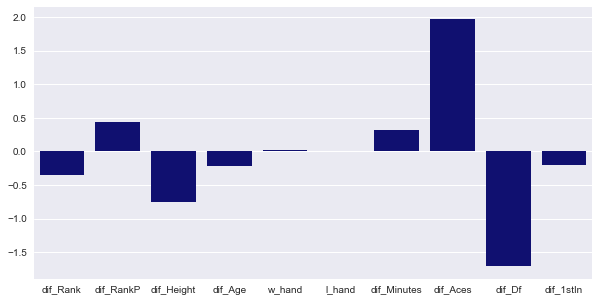

In [213]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.barplot(x=X.columns, y=Coef, color="navy")

     Hay dos variables predictoras que no tienen ninguna influencia sobre el modelo (no son significativas), winner hand y loser hand. Es evidente que ser zurdo o diestro no tiene ninguna influencia en el resultado.

### 5.3.1. Backward Selection:

Las dos variables que mejor definen un modelo de regresión lineal son:
 - r2 : Indica el % de variabilidad explicado por el modelo
 - Residual Standard Error (RSE): Es la medida fundamental de falta de ajuste del modelo.

Cuanto más alta la R2 y más bajo sea el RSE mejor será nuestro modelo.
Conseguimos cambios en estos estadísticos introduciendo o sacando variables de nuestro modelo. Hay dos maneras fundamentales de hacerlo:
 - Forward selection: Metemos una sola variable (la más significativa. Mirar matriz de correlación) y posteriormente vamos añadiendo el resto de una en una. Añadiremos aquellas que mejoren el R2 significativamente y no aumenten significativamente el RSE.
 - Backward selection: HAcemos el proceso inverso, metemos en el modelo todas las variables y vamos descartando aquellas que no aporten inforación, es decir R2, y minimicen el RSE.

 Hemos elegido este segundo método.

#### Vamos a calcular el MSE:

In [214]:
#from sklearn.metrics import mean_squared_error
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [215]:
#Prediction = logreg.predict(X_test)

In [216]:
#mse = mean_squared_error(y_test, Prediction)

In [217]:
#mse

In [218]:
#from math import sqrt
#rmse = sqrt(mean_squared_error(y_test, Prediction))

In [219]:
#rmse

#### Eliminamos variables:

     Vamos a quitar del modelo las variables w_hand y l_hand, ya que no son significativas y por tanto no aportan a mejorar la reducción de la variabilidad y crean ruido en nuestro modelo. Para facilitar el trabajo posterior voy a crear un nuevo data set sin estos dos valores:

In [220]:
X.columns

Index([u'dif_Rank', u'dif_RankP', u'dif_Height', u'dif_Age', u'w_hand',
       u'l_hand', u'dif_Minutes', u'dif_Aces', u'dif_Df', u'dif_1stIn'],
      dtype='object')

In [221]:
X_BackW = TennisDFnorm_X[['dif_Rank', 'dif_RankP', 'dif_Height', 'dif_Age', 'dif_Minutes', 
                      'dif_Aces', 'dif_Df', 'dif_1stIn']]

In [222]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_BackW, y)
logreg.score(X_BackW, y, sample_weight=None)

0.83885765367333975

In [223]:
cv_LogReg = cross_val_score(logreg,X,y,cv=10)

     El accuracy mantiene totalmente constante ya que esas variables no aportaban nada, sin embargo, se debería reducir el ruido del modelo, los cual se debería reflejar en una disminución del RSE.

In [224]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_BackW)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     4635.
Date:                Mon, 13 Nov 2017   Prob (F-statistic):               0.00
Time:                        21:04:29   Log-Likelihood:                -17520.
No. Observations:               42509   AIC:                         3.506e+04
Df Residuals:                   42500   BIC:                         3.514e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4999      0.002    282.069      

#### Vamos a ver com ha variado el RSE:
Para ello cambiamos prediction para quitar los predictores que no están y cambiar los coeficientes del resto.

In [225]:
#X_train, X_test, y_train, y_test = train_test_split(X_8, y, random_state=42)

In [226]:
#Prediction = logreg.predict(X_test)

In [227]:
#mse = mean_squared_error(y_test, Prediction)

In [228]:
#mse

     Después de hacer el calculo del MSE con el modelo de 10 y de 8 variables obtenemos el mismo resultado. Esto no es correcto. 
     Entre un modelo y otro basicamente se ha movido el F-statistic que mejora sensiblemente, aunque ya era muy alto, por lo que no nos aporta mucha información.

### 5.3.2. Correlation matrix:

**Visualizacion 1:**

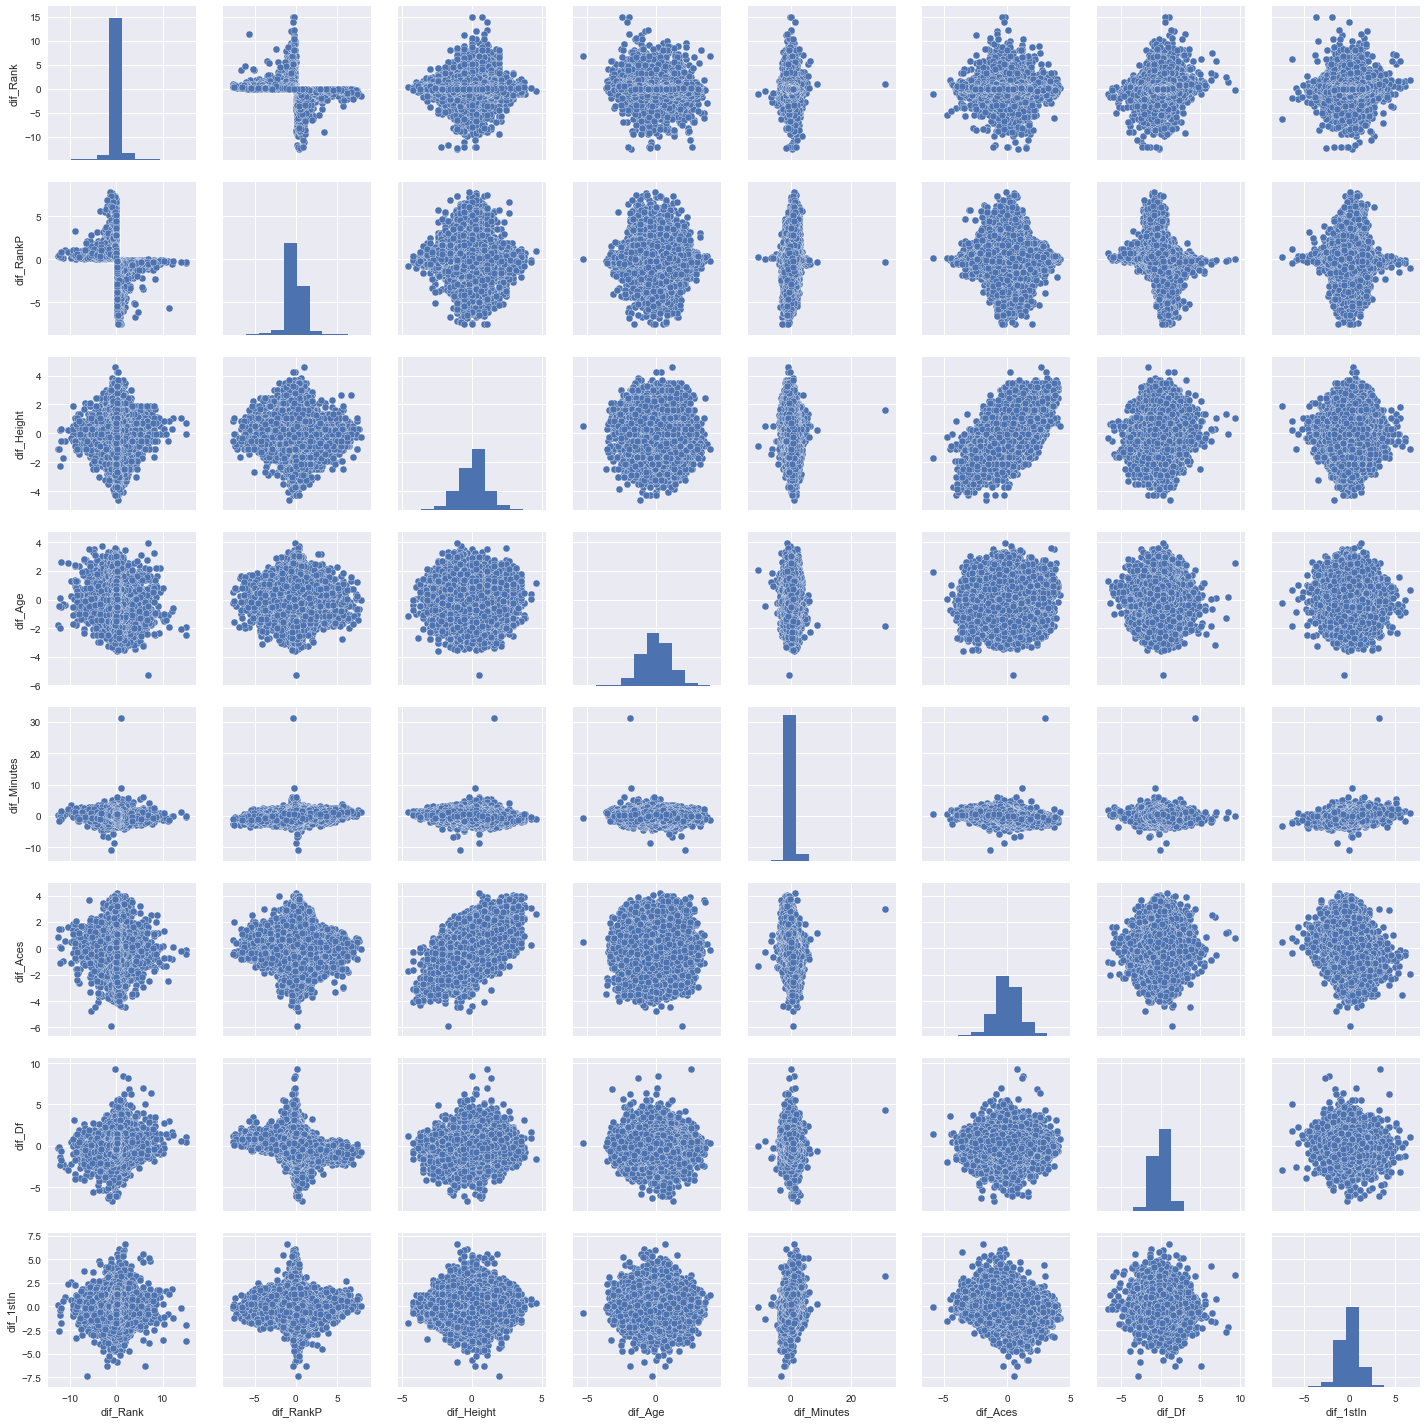

In [229]:
plt.figure(figsize=(20,20))
sns.pairplot(X_BackW)
plt.show()

     La relación más fuerte entre variables parece que existe entre el número de Aces y la altura del jugador, lo cual parece evidente. Con double faults existe correlación aunque es de menor intensidad

**Visualizacion 2:**

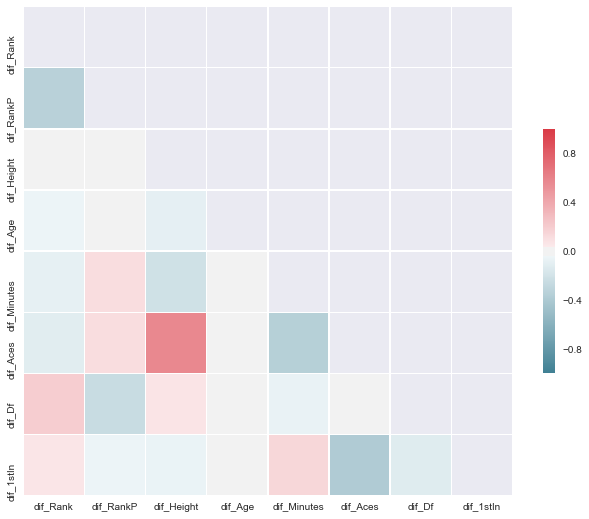

In [230]:
corr = X_BackW.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

     Gracias a la matriz de correlación podemos ver ademas que también existe una realación fuerte entre el numero de double faults y el puesto en el Rank o las Rank poitns, cuanto mas alto es tu numero de Rank mayor la diferencia en el índice de double faults.
     
      Existen otras relaciones interesantes como que cuanto es la diferencia en numero de Aces, menor es la diferencia en duración del partido.

In [231]:
hwin = framesDCWO2['winner_ht'].mean()
hlos = framesDCWO2['loser_ht'].mean()
print hwin
print hlos

185.69106933
185.194876616


In [232]:
hwin_over100 = framesDCWO2[framesDCWO2['winner_rank'] > 50]
hwin_over100 = hwin_over100['winner_ht'].mean()
hwin_in100 = framesDCWO2[framesDCWO2['winner_rank'] < 50]
hwin_in100 = hwin_in100['winner_ht'].mean()
print hwin_over100
print hwin_in100

185.128737589
186.101088016


     La altura media en los ganadaores es mayor que en los perdedores, este hecho se acentúa si filtramos la información entre los situados en las 50 primeras posiciones del ranking mundial y el resto.

### 5.3.3. Reducción dimensionalidad:

     En este modelo el numero de variables es pequeño por lo que podríamos hacer la selección de variables (backward o forward) de manera manual facilmente. Sin embargo si el modelo fuera más extenso en terminos de predictores, esta tarea se volvería mucho más compleja y lenta. Actualmente no existe ningún paquete con algoritmos para hacer estos dos procesos. Otros métodos como la Regresión de Lasso (least absolute shrinkage and selection operator) no se pueden utilizar en métodos de clasificación.
 
     Si tuvieramos un escenraio diferente, con muchas variables, lo solución más facil sería crear una función que probase las p^(p-1) posibles combinaciones.

## 5.4. KNNeighbours:

      El siguiente modelo que utilizaremos será el K vecinos, el cual trataremos de optimizar a través del número de vecinos (k)

In [233]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [234]:
X = TennisDFnorm_X
y = TennisDF['Y']

In [235]:
clf = KNeighborsClassifier(n_neighbors = 5)

     Vamos a separa ed data set en train-test:

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

     Por defecto el sistema separa en 75% train 25% test:

In [237]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### a) Vamos a valorar el ajuste del modelo:

In [238]:
accuracy_score(clf.predict(X_test), y_test)

0.8295069627399323

In [239]:
cv_KNN = cross_val_score(clf,X,y,cv=10)
cv_KNN

array([ 0.74106303,  0.7953904 ,  0.81157375,  0.84497765,  0.83368619,
        0.84733004,  0.8398024 ,  0.83623529,  0.84070588,  0.83482353])

In [240]:
np.average(cv_KNN)

0.82255881701416611

    El accuracy es muy similar al de la regresión lineal.

#### b) Vamos a averiguar el número óptimo de K:

In [241]:
scores=[]
for i in range(1,25):
    clf = KNeighborsClassifier(n_neighbors=i)
    scores.append(cross_val_score(clf,X,y,cv=4))

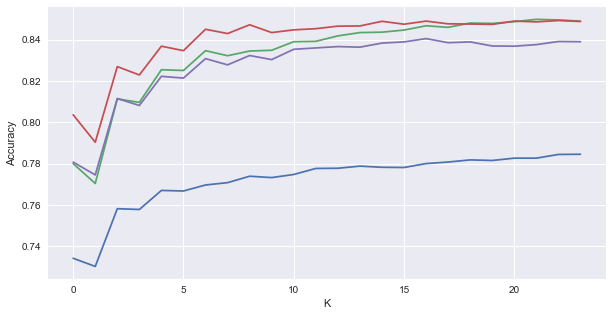

In [242]:
plt.figure(figsize=(10,5))
plt.plot(scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

     La mejora del accuracy es sustancial de 1 a 5. De 5 a 10 mejora en menor medida y apartir de aqui no se produce ninguna mejora más. El cálculo es muy lento, por lo que cuantos menos kneighbours utilicemos más rebajaremos el tiempo de proceso. El númer optimo se sitúa en el entorno de los 5 kneigbours.

## 5.5. SVM:

     En el caso de SVM vamos a optimizar el kernel y para valorar el modelo vamos a calcular los porcentajes de precision y recall del modelo:

In [243]:
from sklearn.svm import SVC

In [244]:
X = TennisDFnorm_X
y = TennisDF['Y']

In [245]:
clf = SVC()
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

     Como sospechamos que el ajuste lineal no es el que mejor va a funcionar vamos a cambiara el kernel a rbf, para que el algoritmo se ajuste mejor al modelo:

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
clf = SVC(kernel='rbf')
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [247]:
accuracy_score(y_test,clf.predict(X_test))

0.85594655626646599

     El accuracy obtenido es ligeramente superior al obtenido por la regresión lineal.

In [248]:
cv_SVM = cross_val_score(clf,X,y,cv=10)

In [249]:
cv_SVM

array([ 0.77375353,  0.81655691,  0.82992237,  0.87461774,  0.8616796 ,
        0.86920725,  0.86497295,  0.84964706,  0.85858824,  0.86847059])

In [250]:
np.average(cv_SVM)

0.84674162304023071

### 5.5.1. Valuation: Roc Curve

     Completamos el analisis: Mostramos la matriz de confusion y calculamos los índices:

**Precision** = True Positives / True Positives + False Positives

**Recall** = True positives / True Positives + False Negatives

In [251]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [252]:
mat = confusion_matrix(y_test,clf.predict(X_test))
dfmat = pd.DataFrame(mat,index = ["Win","Lose"],
                  columns = ["Win","Lose"])

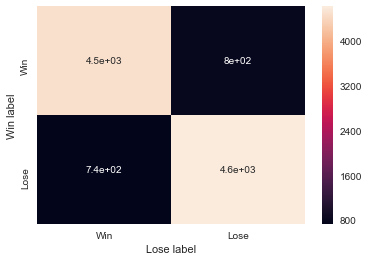

In [253]:
sns.heatmap(dfmat,annot=True)
plt.ylabel('Win label')
plt.xlabel('Lose label')
plt.show()

In [254]:
Precision = float(dfmat.iloc[0,0]) / (float(dfmat.iloc[0,0] + dfmat.iloc[0,1]))
Precision
Recall = float(dfmat.iloc[0,0]) / (float(dfmat.iloc[0,0] + dfmat.iloc[1,0]))
Recall
print """    De los partidos que hemos clasificados como ganadores, el %f tuvieron ese resultado. En total clasificamos 
correctamente el %f, de todos los partidos con categoría ganador. """ %(Precision, Recall)


    De los partidos que hemos clasificados como ganadores, el 0.849470 tuvieron ese resultado. En total clasificamos 
correctamente el 0.859384, de todos los partidos con categoría ganador. 


In [255]:
F1score = (2*float(dfmat.iloc[0,0]))/((2*float(dfmat.iloc[0,0])+float(dfmat.iloc[0,1])+float(dfmat.iloc[1,0])))
F1score

0.8543984783642415

     Este sería el punto óptimo de la curva precisión-recall. El F1 score, coincide practicamente con el accuracy score obtenido anteriormente.

**Vamos a dibujar la precision-recall curve:**###

In [256]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

In [257]:
y_score = clf.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

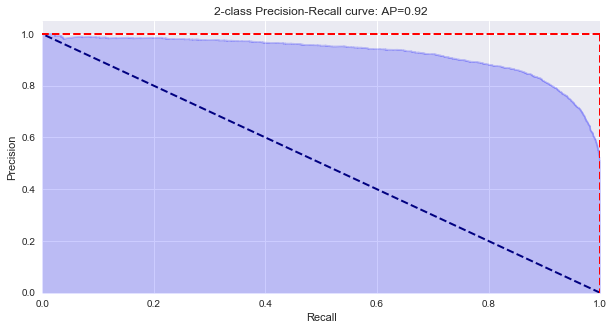

In [258]:
plt.figure(figsize=(10,5))
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.plot([1, 0], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot([1, 0], [1, 1], color='red', lw=2, linestyle='--')
plt.plot([1, 1], [1, 0], color='red', lw=2, linestyle='--')
plt.show()

     Como vimos con anterioridad, el punto de la curva 0.849 , 0.847 que arroja el modelo como óptimo corresponde al vértice de la curva.
     La linea roja es AUC=1 o valor de diagnostico perfecto, mientras que la linea morada es AUC=0.92 o el diagnostico del modelo de test. Un diagnostico superior al 0.75 se puede considerar bueno. Un diganostico del 0.92 significa que hay un 92% más de probabilidades de que nuestra clasificación sea correcta que si hicieramos una elección al azar (AUC=0.50, linea azul)

## 5.6. Decision Tree:

     Los arboles de decisión tienen un funcionamiento diferente a los metodos observados con anterioridad, definen mejor relaciones no lineales de las variables del modelo. Tienen la ventaja de que son mas faciles de comprender e incluso se pueden dibujar con facilidad, algo imposible en un entorno de alta dimensionalidad.

In [259]:
from sklearn import tree

In [260]:
X = TennisDFnorm_X
y = TennisDF['Y']

In [261]:
clf = tree.DecisionTreeClassifier(max_depth=5)

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [263]:
accuracy_score(y_test,clf.predict(X_test))

0.81003010914565299

In [264]:
cv_Tree = cross_val_score(clf,X,y,cv=10)

In [265]:
cv_Tree

array([ 0.73988711,  0.7784572 ,  0.78781463,  0.83156904,  0.83203952,
        0.82357092,  0.81627852,  0.81247059,  0.82517647,  0.81929412])

In [266]:
np.average(cv_Tree)

0.80665581267626218

     El resultado obtenido es mucho peor que con cualquiera de los otros clasificadores.

### 5.6.1. Visualization and Max. Depth:

In [267]:
import pydotplus
%matplotlib inline
from IPython.display import Image

In [268]:
colnames = X.columns

In [269]:
dot_data=tree.export_graphviz(clf, out_file=None, feature_names=['dif_Rank', 'dif_RankP', 'dif_Height', 'dif_Age', 'w_hand',
       'l_hand', 'dif_Minutes', 'dif_Aces', 'dif_Df', 'dif_1stIn'], filled=True)

In [270]:
graph = pydotplus.graph_from_dot_data(dot_data)

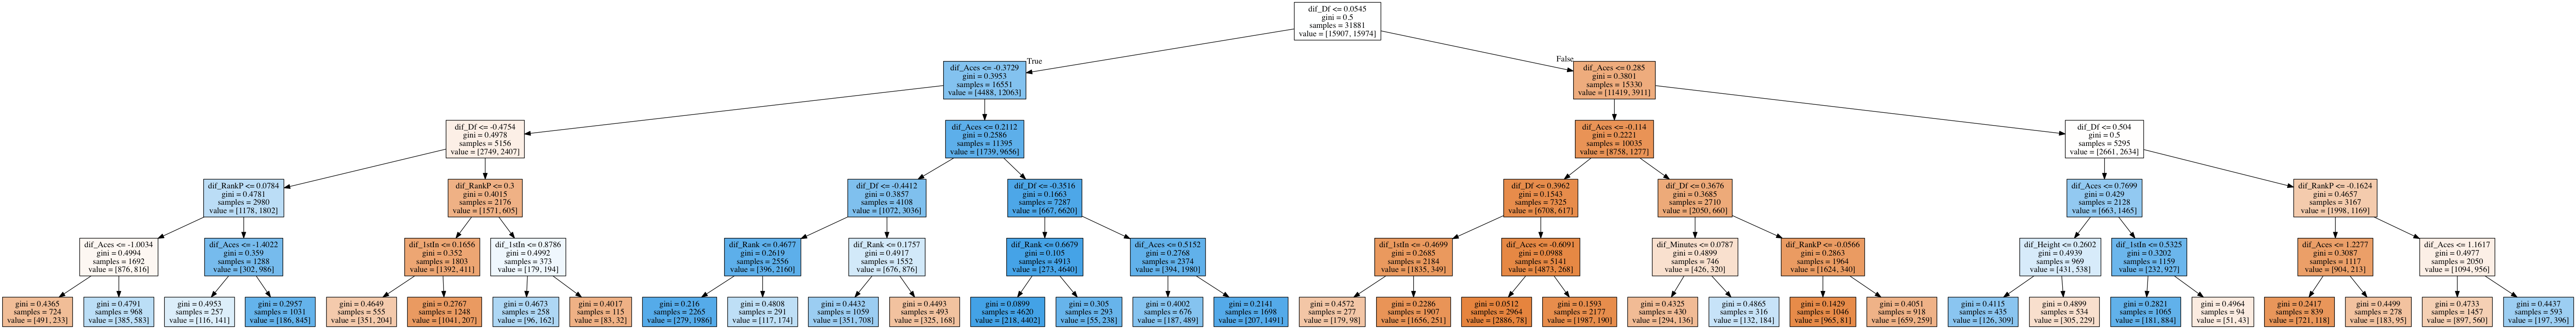

In [271]:
Image(graph.create_png())

#### Interpretación:

     El objetivo de un modelo Decision Tree es preveer el valor destino (y) en función de diversas variables de entrada (X). Metricas:
* **Gini** (grado de impureza)
* **Entropia** o ganancia de información (información asociada a la distribución de probabilidades)

     Por defectos hemos elegido utilizar Gini como medida.

     El modelo busca ir creando nodos hijos con un nivel de pureza mejor (menor Gini). Por ello empieza con variable que el modelo estima es la que menos información aporta, en este caso ** *df_minutes* **. Y continua creando los siguientes con varibales que con poca información,** *l_hand, w_hand. * ** Recordemos que estas dos variables son las que sacamos del modelo, porque no aportaban información y contribuían a incrementar el RSE. 
Los nodos finales de nuestro árbol, por tanto, estarán formados por las variables que aporten mayor información individualmente (* **df_Aces** * por ejemplo) o en conjunto con las otras.

In [272]:
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation as cv
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn import preprocessing
from scipy.stats import randint as sp_randint

     A cotinuación, com hemos hecho en otros modelos, vamos a intentar optimizar este clasificador a travès de alguna de sus características. Las más fácil de comprender es la Profundidad del árbol. ¿Hasta que punto es interesante incrementarla?

**Profundidad del Árbol:**

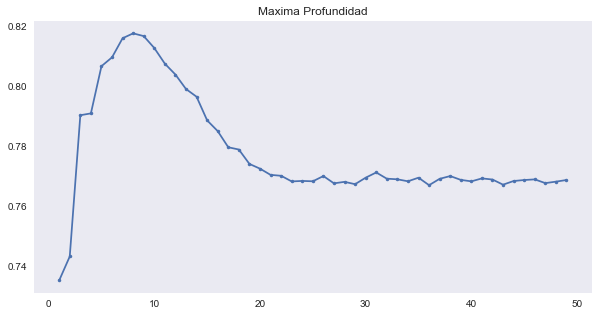

In [273]:
plt.figure(figsize=(10,5))
feature_param = range(1,50)
scores=[]
for feature in feature_param:
    clf = DecisionTreeClassifier(max_depth=feature)
    clf.fit(X_train,y_train)
    scoreCV = sklearn.cross_validation.cross_val_score(clf, X, y, cv= 10)
    scores.append(np.mean(scoreCV))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
# plt.xlabel('parameter')
# plt.ylabel('score')
plt.title('Maxima Profundidad')
plt.grid();

     El ajuste de este algoritmo mejora hasta los 7 niveles de profundidad en los que alcanza su máximo ajuste

## 6. Cross Validation:

### 6.1. Cross Validation:

     Entre el resultado obtenido en un escenario de train y un escenario de test existe diferencias, es lo que se denomian Test errorr rate. Para minimizar este error se utilizan tecnicas para dividir el test de train en diferentes subsets y obtener su ajuste. Existen diferentes tecnicas, la utilizada en todos los modelos con anterioridad es la denominada k-fold en la que decidimos el numero k de cortes diferentes. El primer corte será tratado como validation.

### 6.2. Bagging:

     Como pudimos ver con anterioridad, al dividir un data set aleatoriamente en varios set de train, el resultado puede ser sensiblemente difente al aplicar el modelo en el set de test. La varianza puede ser elevada.

     Para evitar este problema:
     Bootstrap aggregarion o Bagging son metodos dirigidos a reducir la varianza en un modelo. Como no disponemos de varios set de train lo que haremos es hacer distintos sets del original train set y hacer una media de los distintos accuracies sobre el data set de test.

     Bagging es muy util, especialmente para decision trees, ya que cada arbol individualmente tienen un sesgo pequeño pero una varianza alta. La regresión logística, por el contrario, tiene una varianza pequeña pero podría tener un sesgo importante por lo que no es interesante hacer bagging.

     En el caso del Bagging utilizaremos el Out-of-Bag score para medir su accuracy.

     El problema del bagging es que al ser una combinación de muchos árboles, no vamos a poder dibujar nuestro árborl de decisión ni tampoco saber la importancia de las variables.


In [274]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [275]:
X = TennisDFnorm_X
y = TennisDF['Y']

**a) Hacemos Bagging con Decision Tree:**

In [276]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),oob_score=True)
clf.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [277]:
accuracy = clf.oob_score_
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.15%


     No hemos obtenido una mejora sobre el resultado obtenido con el set de train-test

**b) Hacemos el Bagging con SVM** (que es el algoritmo que mejor resultado nos ha dado):

In [278]:
clf = BaggingClassifier(base_estimator=SVC(kernel='rbf'),oob_score=True)
clf.fit(X,y)

BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [279]:
accuracy = clf.oob_score_
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.72%


     Tampoco obtenemos ningna mejora sobre el calculo en las muestras de train-test

### 6.3. Random Forest:

     El random forest funciona de una manera similar al bagging, pero con la diferencia de que limita el numero de predictores que mete en cada árbol. De esta forma se evita construir muchos árboles con los predictores con más entropía en la parte superior del árbol, lo que produciría que la mayor parte de los árboles fueran iguales.

In [280]:
from sklearn.ensemble import RandomForestClassifier

In [281]:
X = TennisDFnorm_X
y = TennisDF['Y']

In [282]:
clf = RandomForestClassifier(max_depth=3,oob_score=True)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [283]:
accuracy = clf.oob_score_
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.19%


In [284]:
cv_RandomF = cross_val_score(clf,X,y,cv=10)

In [285]:
np.average(cv_RandomF)

0.79541134949793757

In [286]:
clf.feature_importances_

array([ 0.09208331,  0.18911928,  0.00255695,  0.0023215 ,  0.        ,
        0.        ,  0.00085035,  0.2842448 ,  0.40005156,  0.02877226])

**Al igual que guardamos los cv scores de todos los modelos, vamos a guardar también la feature_imp para hacer una comparativa posteriormente:**

In [287]:
FI_RandomF = clf.feature_importances_

     Visualizamos la matriz de importancia de las variables predictoras:

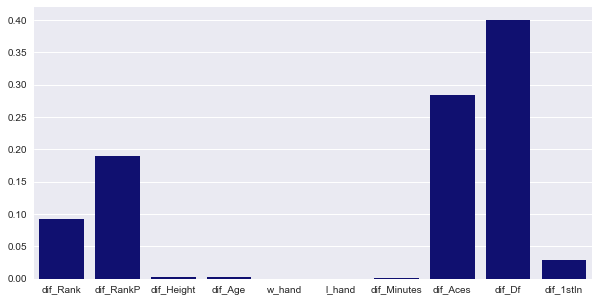

In [288]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.barplot(x=X.columns, y=clf.feature_importances_, color="navy")

     Como hemos hecho en otros modelos, vamos a intentar optimizar este clasificador a travès de alguna de sus características. En este caso vamos a determinar el número de estimadores óptimo.

**Número de Estimadores y Máxima Profundidad:**

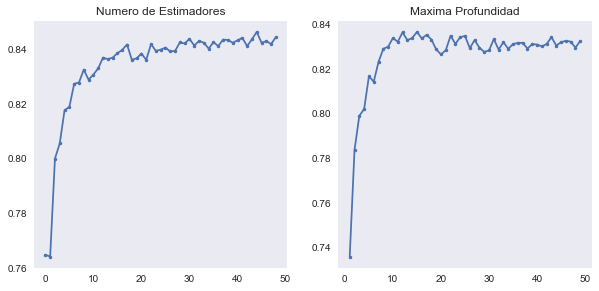

In [289]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
feature_param = range(1,50)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(n_estimators=feature)
    clf.fit(X_train,y_train)
    scoreCV = clf.score(X_test,y_test)
    scores.append(scoreCV)
plt.plot(scores, '.-')
plt.axis('tight')
# plt.xlabel('parameter')
# plt.ylabel('score')
plt.title('Numero de Estimadores')
plt.grid();


plt.subplot(2,2,2)
feature_param = range(1,50)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_depth=feature)
    clf.fit(X_train,y_train)
    scoreCV = clf.score(X_test,y_test)
    scores.append(scoreCV)
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
# plt.xlabel('parameter')
# plt.ylabel('score')
plt.title('Maxima Profundidad')
plt.grid();

#### Interpretación del modelo:

     En el caso de Random Forest coincide la máxima profundidad del modelo en 7 niveles. En el caso de los estimadores el número otptimo estaría probablemente en 6, ya que apartir de aquí el accuracy no mejora sustancialmente y el cálculo se va complicando.

### 6.4. Boosting:

In [290]:
from xgboost import XGBClassifier

In [291]:
X = TennisDFnorm_X
y = TennisDF['Y']

In [292]:
clf = XGBClassifier()

In [293]:
clf.fit(X,y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [294]:
cv_Boosting = cross_val_score(clf, X, y, cv=10)

In [295]:
cross_val_score(clf, X, y, cv=5)

array([ 0.78372339,  0.84558391,  0.85366427,  0.84143042,  0.84919421])

In [296]:
np.average(cv_Boosting)

0.83662590752977672

In [297]:
clf.feature_importances_

array([ 0.08189655,  0.0775862 ,  0.14655173,  0.0316092 ,  0.01149425,
        0.01436782,  0.05747126,  0.26867816,  0.2341954 ,  0.07614943], dtype=float32)

In [298]:
FI_Boosting = clf.feature_importances_

#### Visualización 1:

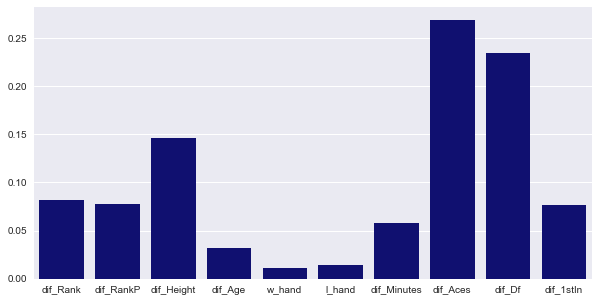

In [299]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.barplot(x=X.columns, y=clf.feature_importances_, color="navy")
plt.show()

#### Visualización 2:

In [300]:
import plotly.offline as py
import plotly.graph_objs as go

In [301]:
py.init_notebook_mode()

In [302]:
py.iplot([go.Scatter(x=X.columns, y=clf.feature_importances_)])

#### Interpretación:

In [303]:
print """Las variables predictoras con un mayor peso en el modelo son: 

   - dif_Aces: %f 
   - dif_Df: %f 
   - dif_Height: %f"""%(clf.feature_importances_[2],clf.feature_importances_[7],clf.feature_importances_[8])

Las variables predictoras con un mayor peso en el modelo son: 

   - dif_Aces: 0.146552 
   - dif_Df: 0.268678 
   - dif_Height: 0.234195


     Esta interpretación es muy similar la obtenida en la regresión lineal:
    - dif_Df
    - dif_Aces
    - dif_Height

## 7. Combining models:

### 7.1. Voting Classifier:

     Combinar modelos a veces puede mejorar el accuracy de cualquiera de ellos por separado. El algoritmo que vamos a crear clasifica el evento, teniendo en cuenta el resultado obtenido por otros algoritomos previamente. Puede elegir la clasificación que salga en la mayoría (voting = hard) o hacer una media de los resultados de estos (voting = soft).

     Como los resultados de nuestros algoritmos son muy similares, utilizar el método soft no nos va a cambiar sustancialemente el accuravy. Vamos a probar con la mayoría para contrastar si hubiera diferencias sustanciales.

In [304]:
clf1= linear_model.LogisticRegression()
clf2= SVC(kernel = 'rbf')
clf3= XGBClassifier()

     Ahora vamos a ver la correlación entre los clasdificadores combinados. Vamos a utilizar para ello la correlación de Spearman, que tiene algunas ventajas sobre la correlación de Pearson y se encuentra menos restringido a descubrir sólo una asociación lineal entre las variables. 

In [305]:
from scipy import stats
mat = []
estimators=[('LM', clf1), ('SVC', clf2), ('XGBC', clf3)]
for estimator in estimators:
    estimator[1].fit(X_train,y_train)
for i in range(len(estimators)):
    temp = []
    for j in range(len(estimators)):
        temp.append(stats.spearmanr(estimators[i][1].predict(X_test),estimators[j][1].predict(X_test)).correlation)
    mat.append(temp)

In [306]:
dfmat = pd.DataFrame(mat,index = ['LM','SVM','XGBC'],
                  columns = ['LM','SVM','XGBC'])

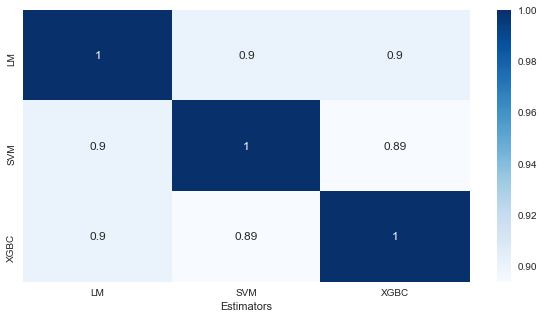

In [307]:
plt.figure(figsize=(10,5))
sns.heatmap(dfmat,annot=True, cmap = 'Blues')
plt.xlabel('Estimators')
plt.show()

     La correlación entre los clasificadores es muy elevada, practicamente total.

In [308]:
from sklearn.ensemble import VotingClassifier

     Vamos a ver de un vistazo las caristicas configuradas por defecto en los estimadores:

In [309]:
estimators

[('LM',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False)),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)),
 ('XGBC',
  XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
         gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
         min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
         objective='binary:logistic', reg_alpha=0, reg_lambda=1,
         scale_pos_weight=1, seed=0, silent=True, subsample=1))]

In [310]:
clf = VotingClassifier(estimators=estimators)

In [311]:
clf.fit(X,y)

VotingClassifier(estimators=[('LM', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('SVC', SVC(C=...logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))],
         n_jobs=1, voting='hard', weights=None)

In [312]:
cv_Voting = cross_val_score(clf, X, y, cv=10)

In [313]:
np.average(cv_Voting)

0.84227180967266246

     El resultado es evidente, si la correlación es tan alta, los resultados obtenidos para cada partido serán prácticamente iguales para los tres, no mejorando por tanto el accuracy de nuestro modelo.

## 8. Conclusiones:

     En primer lugar vamos a analizar las variables predictoras más importantes para los distintos modelos.

In [314]:
Comparative_F = pd.DataFrame()
Comparative_F['Features'] = X.columns
Comparative_F['FI_Random'] = FI_RandomF
Comparative_F['FI_Boosting'] = FI_Boosting

In [315]:
Comparative_F.head()

Features  FI_Random  FI_Boosting
0    dif_Rank   0.092083     0.081897
1   dif_RankP   0.189119     0.077586
2  dif_Height   0.002557     0.146552
3     dif_Age   0.002322     0.031609
4      w_hand   0.000000     0.011494

In [316]:
df = pd.melt(Comparative_F, id_vars="Features", var_name="Model", value_name="Importance")

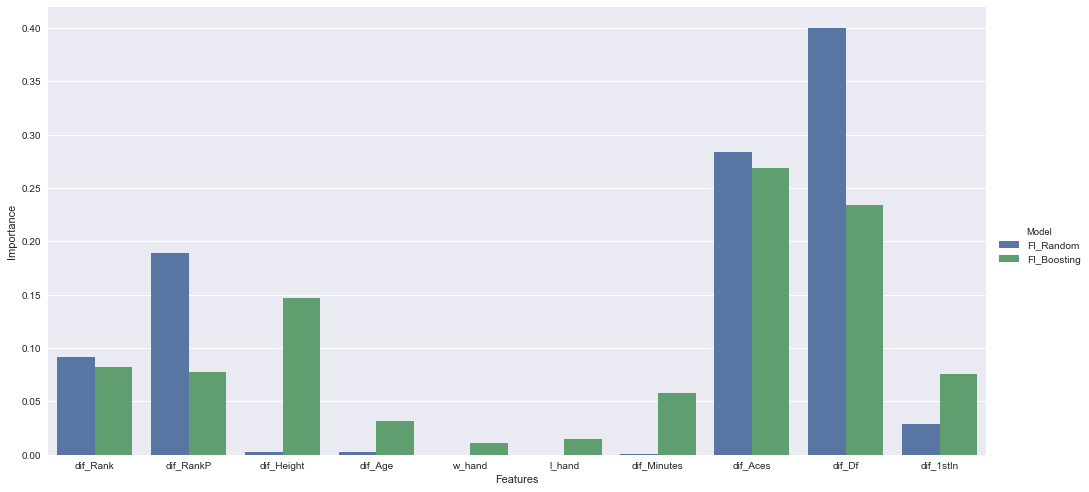

In [317]:
sns.factorplot(x='Features', y='Importance', hue='Model', data=df, kind='bar', size=(7), aspect=(2))
plt.show()

     Ambos modelos coinciden en la mayor importancia de de df_Aces y df_Df en el modelo. Sin embargo hay una diferencia importante entre ambos, ya que miestras con Boosting todas las variables tienen algún peso en el modelo, en Random Forest tan solo el 50% de las variables tiene algún peso.

     En segundo lugar vamos a comparar el accuracy de modelos a través de un gráfico boxplot, que nos va a mostrar la media, la varianza y los valores extremos obtenidos:

In [318]:
Comparative_M = pd.DataFrame()
Comparative_M['Observations'] = [1,2,3,4,5,6,7,8,9,10]
Comparative_M['LogReg'] = cv_LogReg
Comparative_M['KNN'] = cv_KNN
Comparative_M['SVM'] = cv_SVM
Comparative_M['Tree'] = cv_Tree
Comparative_M['RandomF'] = cv_RandomF
Comparative_M['Boosting'] = cv_Boosting
Comparative_M['Voting'] = cv_Voting

In [319]:
df_M = pd.melt(Comparative_M, id_vars="Observations", var_name="Model", value_name="Accuracy")

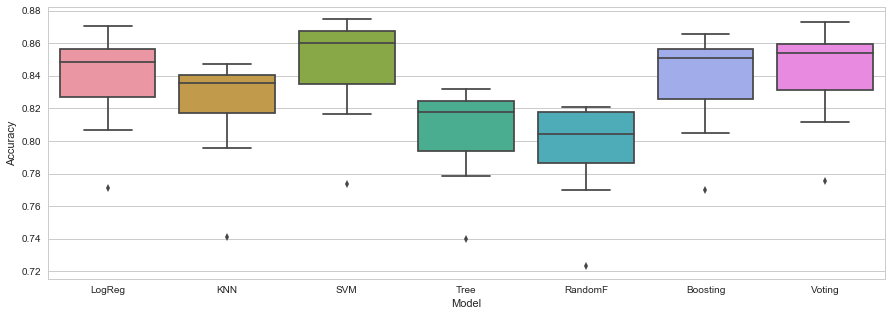

In [320]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
ax = sns.boxplot(x="Model", y="Accuracy", data=df_M)
plt.savefig('ComparativeM.png')

     La comparativa de los distintos modelo es muy clara, SVM obtiene el mejor accuracy medio y el accuracy puntual más alto. Voting, configurado con una combinación de este con LogReg y Boosting, los dos metodos que le siguen en nivel de accuracy, obtiene un puntuación ligeramente inferior. Quizá si en vez de utilizar Boosting, utilizaramos Tree podriamos obtener un resultado diferente.
     Los dos metodos que tienen un peor ajuste son claramente el Decision Tree y el Random Forest. La realidad es que ninguno de los dos estan optimizados al máximo, uno tiene cinco niveles de profundidad y el otro tres cuando su número óptimo sería 7. 
     Cabe destacar las pequeñas diferencias existentes entre los metodos mejor ajustados, menores de 3 puntos porcentuales, y el alto grado de ajuste del modelo. Para haber visto en mayor profundidad las diferencias entre ellos necesitarimos crear más variables con cierto grado de correlación, ya que la mayor parte de los modelos se centran en las mismas variables para hacer el ajuste, y por tanto arrojan unos resultados similares.
     El SVM es un algoritmo que se suele ajustar muy bien, especialmente en entornos no lineles y de alta dimensionalidad. La posibilidad de cambiar el kernel incrementa de manera sencilla su efectividad.